## Maximum likelihood mapmaking

2025-11-28 07:46:22.203 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 109MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -5.777e-04
    max: -1.459e-07
    rms: 7.352e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


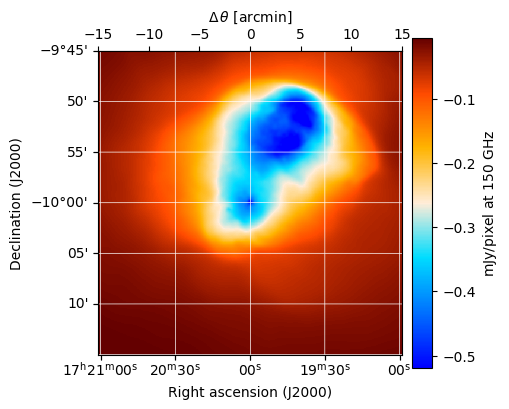

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 5e1 

input_map[..., 256:-256, 256:-256].plot(cmap="cmb")
print(input_map)

PlanList(1 plans, 900 s):
                           start_time duration   target(ra,dec)     center(az,el)
chunk                                                                            
0      2025-11-28 16:18:15.976 +00:00    900 s  (260°, -9.999°)  (48.02°, 71.47°)


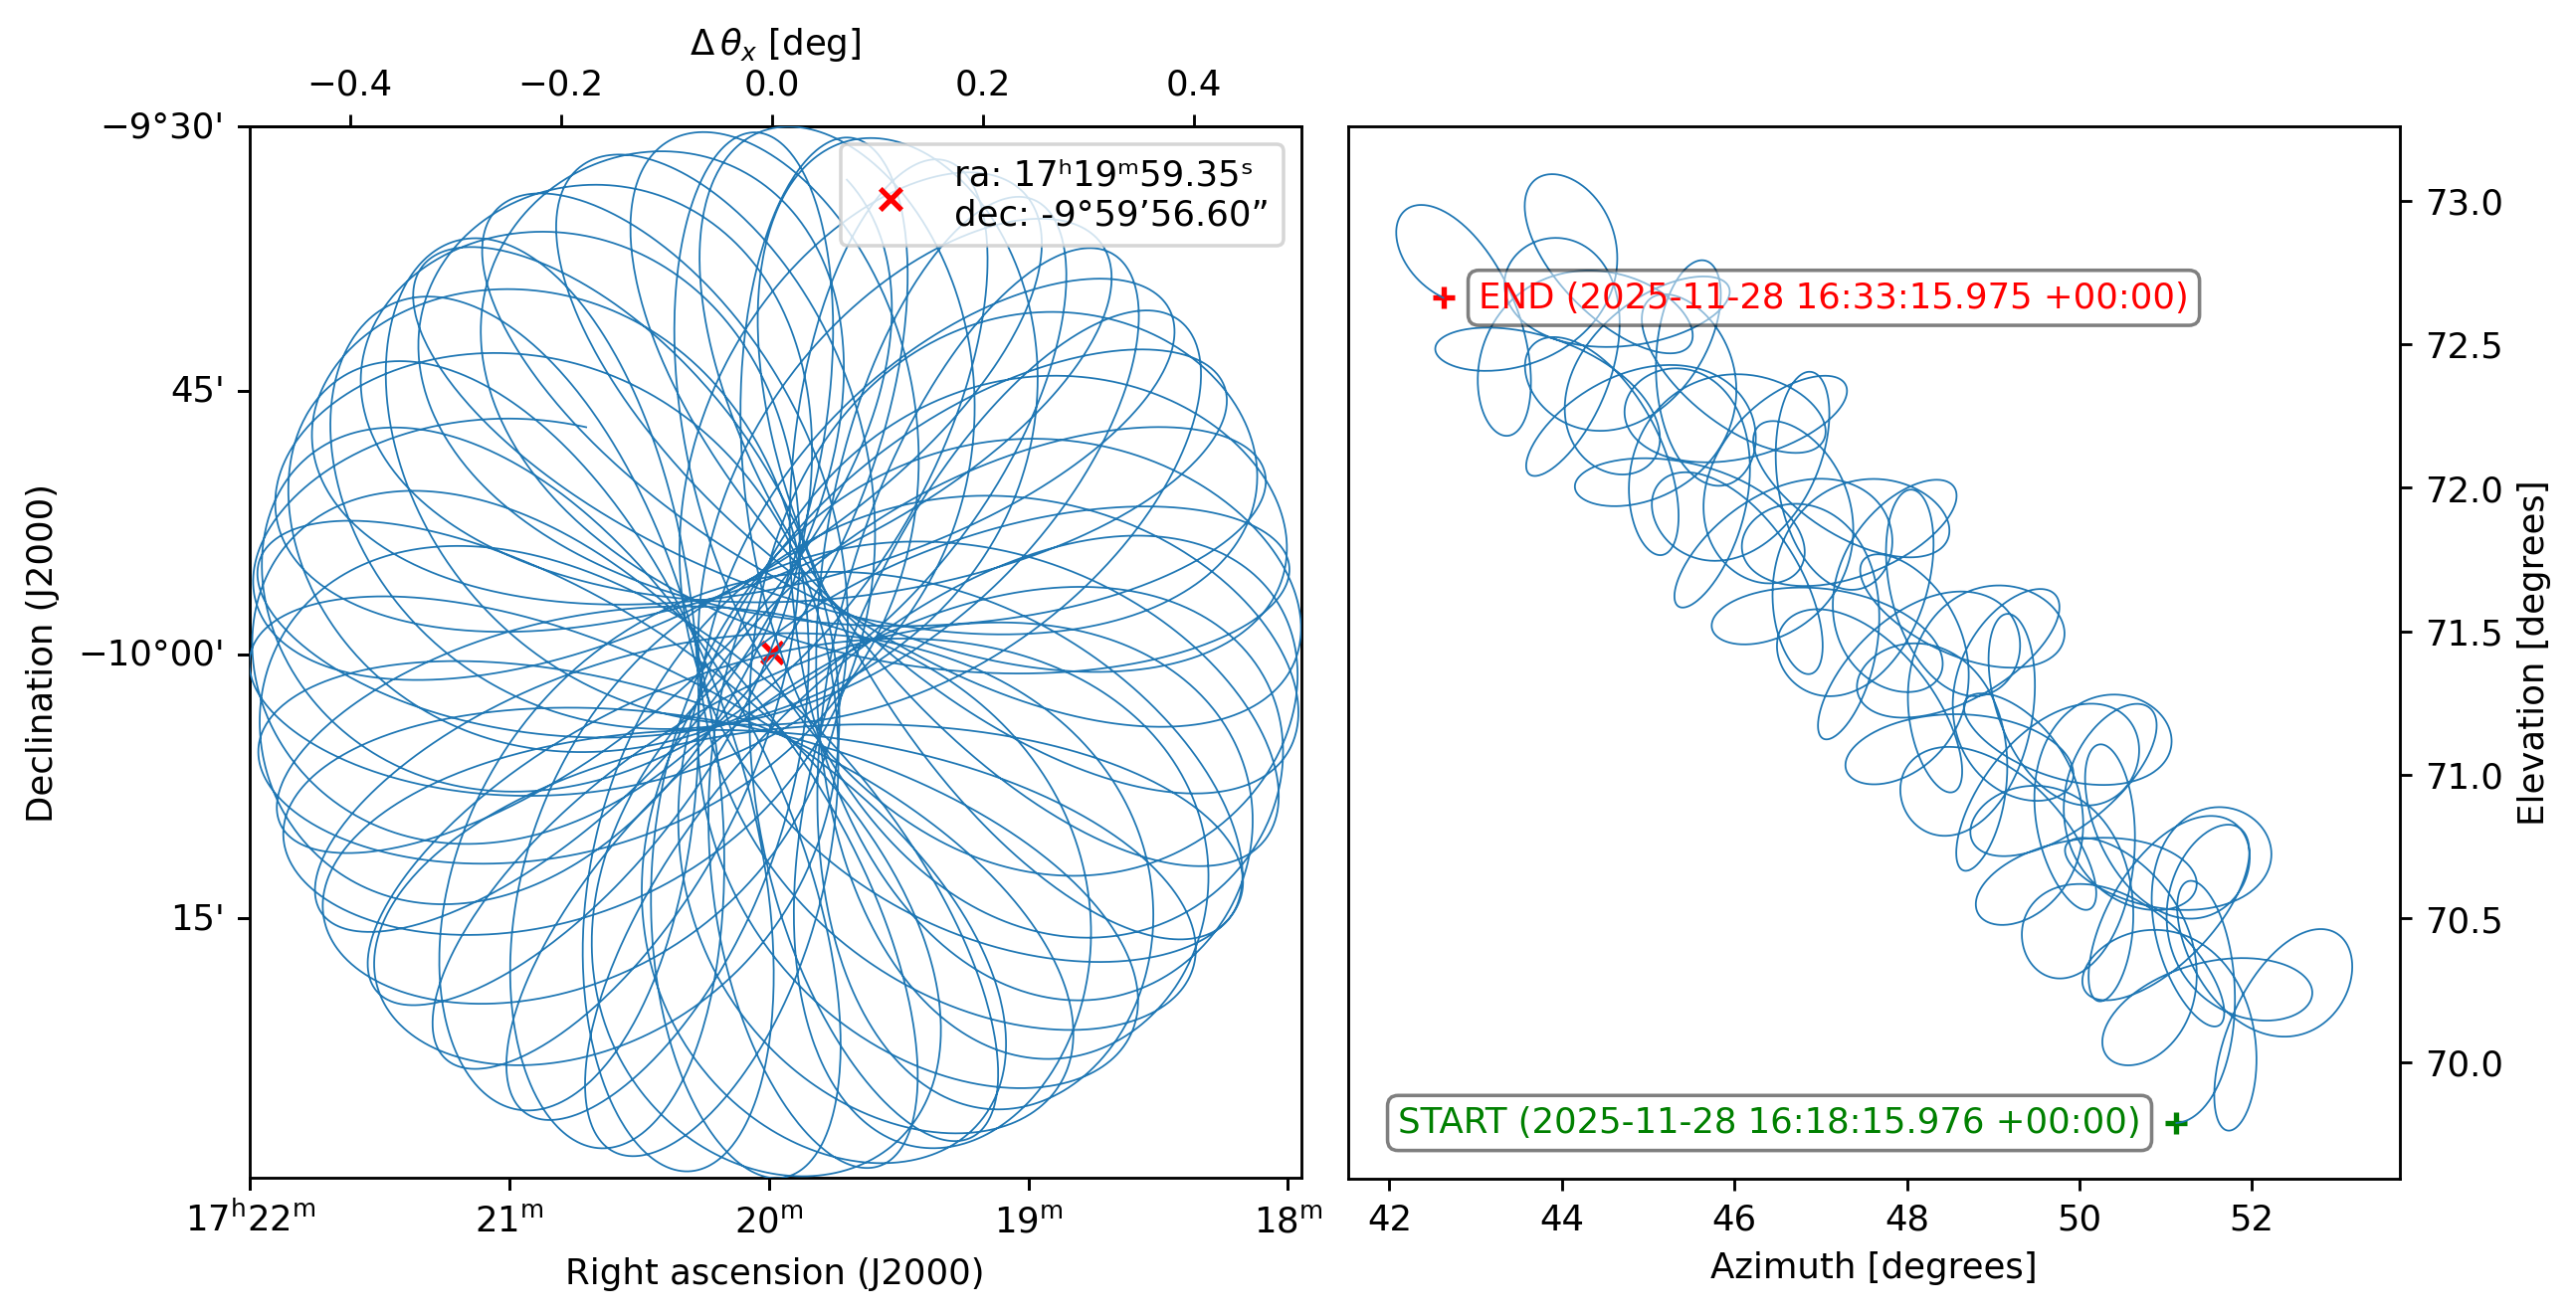

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=900, 
                               max_chunk_duration=900, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  756  6.056’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


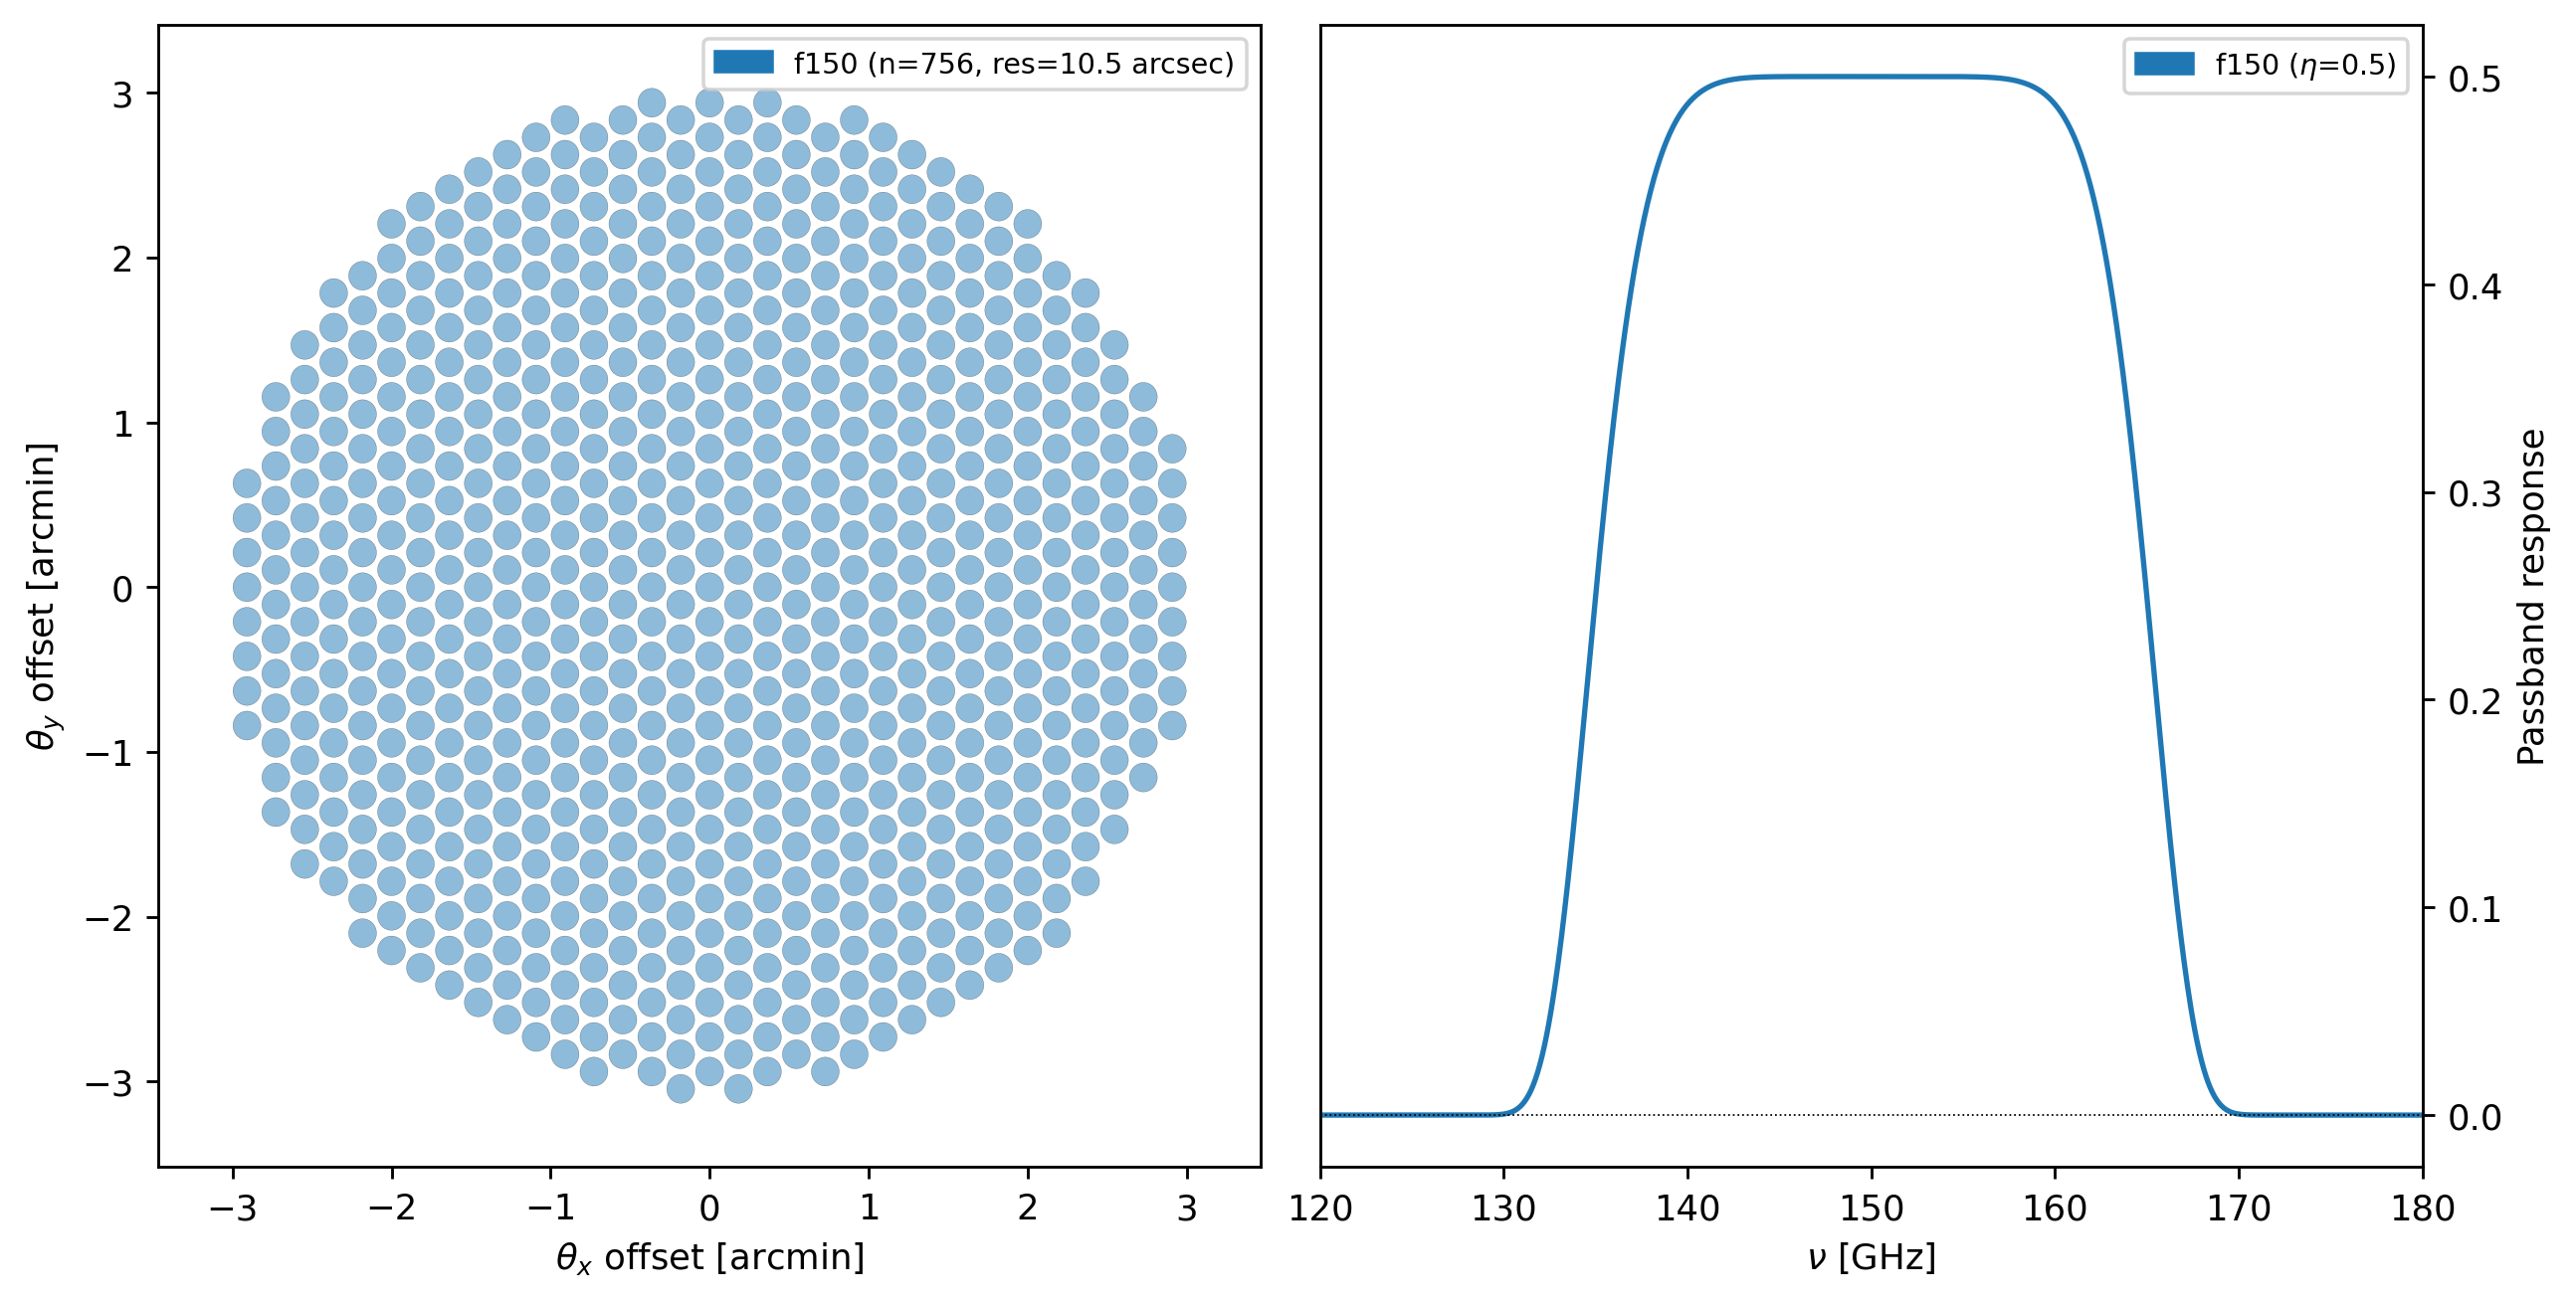

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.2,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  756  6.056’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(1 plans, 900 s):
│                            start_time duration   target(ra,dec)     center(az,el)
│ chunk                                                                            
│ 0      2025-11-28 16:18:15.976 +00:00    900 s  (260°, -9.999°)  (48.02°, 71.47°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
    t: [1.76431598e+09]
    z: naive
    quantity: spectral_flux_density_per_pix

2025-11-28 07:46:32.072 INFO: Simulating observation 1 of 1


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:01<00:07,  1.01s/it]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:05,  1.11it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:02<00:04,  1.19it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:03<00:03,  1.20it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:04<00:02,  1.20it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:05<00:01,  1.17it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:06<00:00,  1.15it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.16it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.16it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 30.88it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 16.36it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 17.57it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:09,  1.29s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.23it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.51it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.69it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.82it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:01,  1.90it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:04<00:00,  1.93it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.79it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.65it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.04it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.04it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map:   0%|                | 0/1 [00:07<?, ?it/s, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.12s/it, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.12s/it, band=f150, channel=(0 Hz, inf Hz)]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.37s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.37s/it, band=f150]

2025-11-28 07:47:25.359 INFO: Simulated observation 1 of 1 in 53.28 s


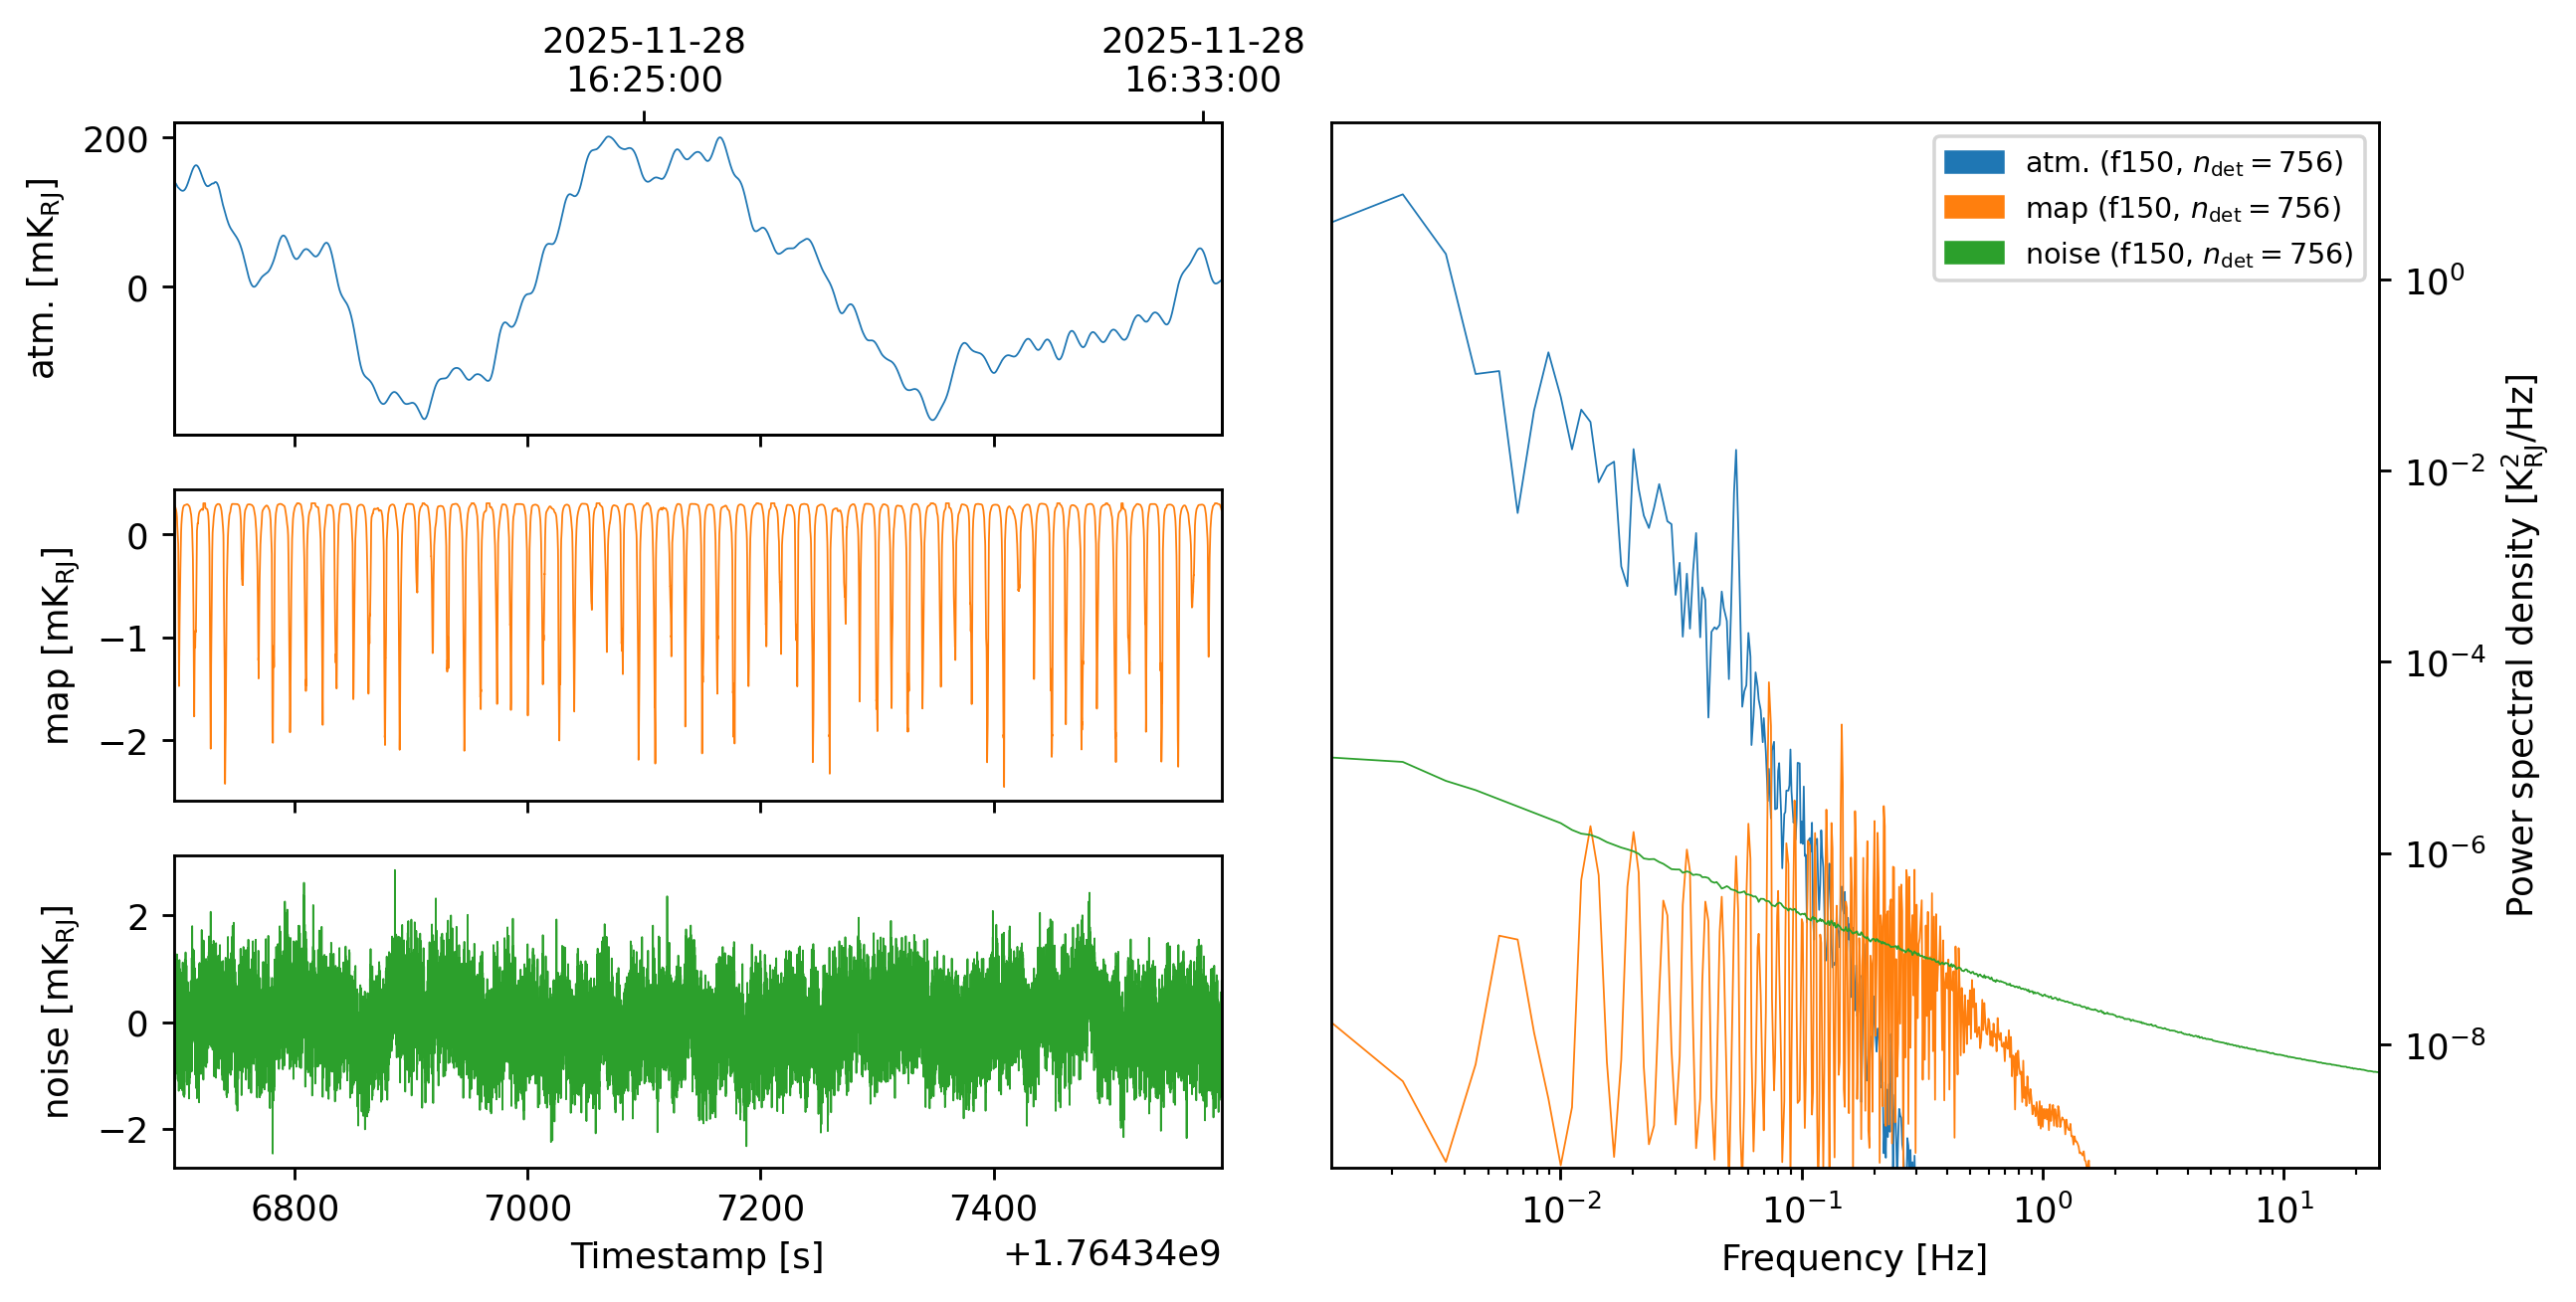

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.8 * input_map.width.deg,
                                    height=0.8 * input_map.height.deg,
                                    units="Jy/pixel")
print(f"{ml_mapper.loss() = }")

2025-11-28 07:47:35.577 INFO: Inferring center {'ra': '17ʰ19ᵐ59.42ˢ', 'dec': '-9°59’55.32”'} for mapper.


2025-11-28 07:47:35.591 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-28 07:47:35.593 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/1 [00:00<?, ?it/s]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.43s/it]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.43s/it]

Mapping:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, tod=1/1]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.30s/it, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.30s/it, tod=1/1]

ml_mapper.loss() = tensor(2457065.5000, grad_fn=<AddBackward0>)


The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 128, 128)
  stokes: I
  nu: [150.] GHz
  t: [1.76434715e+09]
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -3.891e-02
    max: 2.037e-02
    rms: 4.275e-03
  center:
    ra: 17ʰ19ᵐ59.42ˢ
    dec: -9°59’55.32”
  size(y, x): (0.8°, 0.8°)
  resolution(y, x): (0.375’, 0.375’)
  beam(maj, min, rot): [[[[10.4977129 10.4977129  0.       ]]]]”
  memory: 0.2621 MB


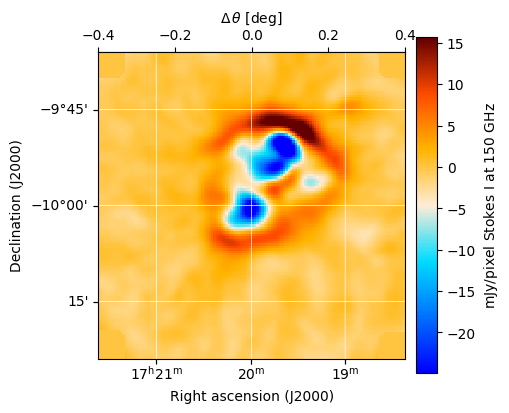

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")


To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=2.457e+06]

epoch 1/4:   3%|▌               | 1/32 [00:04<02:30,  4.85s/it, loss=2.457e+06]

epoch 1/4:   3%|▌               | 1/32 [00:09<02:30,  4.85s/it, loss=2.023e+06]

epoch 1/4:   6%|█               | 2/32 [00:09<02:25,  4.85s/it, loss=2.023e+06]

epoch 1/4:   6%|█               | 2/32 [00:14<02:25,  4.85s/it, loss=1.207e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:14<02:20,  4.85s/it, loss=1.207e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:19<02:20,  4.85s/it, loss=8.411e+05]

epoch 1/4:  12%|██              | 4/32 [00:19<02:15,  4.85s/it, loss=8.411e+05]

epoch 1/4:  12%|██              | 4/32 [00:24<02:15,  4.85s/it, loss=6.590e+05]

epoch 1/4:  16%|██▌             | 5/32 [00:24<02:10,  4.85s/it, loss=6.590e+05]

epoch 1/4:  16%|██▌             | 5/32 [00:29<02:10,  4.85s/it, loss=4.983e+05]

epoch 1/4:  19%|███             | 6/32 [00:29<02:06,  4.86s/it, loss=4.983e+05]

epoch 1/4:  19%|███             | 6/32 [00:34<02:06,  4.86s/it, loss=3.520e+05]

epoch 1/4:  22%|███▌            | 7/32 [00:34<02:01,  4.87s/it, loss=3.520e+05]

epoch 1/4:  22%|███▌            | 7/32 [00:38<02:01,  4.87s/it, loss=2.392e+05]

epoch 1/4:  25%|████            | 8/32 [00:38<01:56,  4.87s/it, loss=2.392e+05]

epoch 1/4:  25%|████            | 8/32 [00:43<01:56,  4.87s/it, loss=1.649e+05]

epoch 1/4:  28%|████▌           | 9/32 [00:43<01:51,  4.86s/it, loss=1.649e+05]

epoch 1/4:  28%|████▌           | 9/32 [00:48<01:51,  4.86s/it, loss=1.217e+05]

epoch 1/4:  31%|█████           | 10/32 [00:48<01:46,  4.85s/it, loss=1.217e+05]

epoch 1/4:  31%|█████           | 10/32 [00:53<01:46,  4.85s/it, loss=9.840e+04]

epoch 1/4:  34%|█████▌          | 11/32 [00:53<01:41,  4.85s/it, loss=9.840e+04]

epoch 1/4:  34%|█████▌          | 11/32 [00:58<01:41,  4.85s/it, loss=8.555e+04]

epoch 1/4:  38%|██████          | 12/32 [00:58<01:36,  4.85s/it, loss=8.555e+04]

epoch 1/4:  38%|██████          | 12/32 [01:03<01:36,  4.85s/it, loss=7.693e+04]

epoch 1/4:  41%|██████▌         | 13/32 [01:03<01:32,  4.84s/it, loss=7.693e+04]

epoch 1/4:  41%|██████▌         | 13/32 [01:07<01:32,  4.84s/it, loss=6.951e+04]

epoch 1/4:  44%|███████         | 14/32 [01:07<01:27,  4.84s/it, loss=6.951e+04]

epoch 1/4:  44%|███████         | 14/32 [01:12<01:27,  4.84s/it, loss=6.226e+04]

epoch 1/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.84s/it, loss=6.226e+04]

epoch 1/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.84s/it, loss=5.527e+04]

epoch 1/4:  50%|████████        | 16/32 [01:17<01:17,  4.84s/it, loss=5.527e+04]

epoch 1/4:  50%|████████        | 16/32 [01:22<01:17,  4.84s/it, loss=4.896e+04]

epoch 1/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.84s/it, loss=4.896e+04]

epoch 1/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.84s/it, loss=4.372e+04]

epoch 1/4:  56%|█████████       | 18/32 [01:27<01:07,  4.85s/it, loss=4.372e+04]

epoch 1/4:  56%|█████████       | 18/32 [01:32<01:07,  4.85s/it, loss=3.977e+04]

epoch 1/4:  59%|█████████▌      | 19/32 [01:32<01:02,  4.85s/it, loss=3.977e+04]

epoch 1/4:  59%|█████████▌      | 19/32 [01:37<01:02,  4.85s/it, loss=3.710e+04]

epoch 1/4:  62%|██████████      | 20/32 [01:37<00:58,  4.85s/it, loss=3.710e+04]

epoch 1/4:  62%|██████████      | 20/32 [01:41<00:58,  4.85s/it, loss=3.555e+04]

epoch 1/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.86s/it, loss=3.555e+04]

epoch 1/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.86s/it, loss=3.484e+04]

epoch 1/4:  69%|███████████     | 22/32 [01:46<00:48,  4.86s/it, loss=3.484e+04]

epoch 1/4:  69%|███████████     | 22/32 [01:51<00:48,  4.86s/it, loss=3.468e+04]

epoch 1/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.86s/it, loss=3.468e+04]

epoch 1/4:  72%|███████████▌    | 23/32 [01:56<00:43,  4.86s/it, loss=3.479e+04]

epoch 1/4:  75%|████████████    | 24/32 [01:56<00:38,  4.85s/it, loss=3.479e+04]

epoch 1/4:  75%|████████████    | 24/32 [02:01<00:38,  4.85s/it, loss=3.495e+04]

epoch 1/4:  78%|████████████▌   | 25/32 [02:01<00:33,  4.86s/it, loss=3.495e+04]

epoch 1/4:  78%|████████████▌   | 25/32 [02:06<00:33,  4.86s/it, loss=3.500e+04]

epoch 1/4:  81%|█████████████   | 26/32 [02:06<00:29,  4.85s/it, loss=3.500e+04]

epoch 1/4:  81%|█████████████   | 26/32 [02:11<00:29,  4.85s/it, loss=3.484e+04]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:11<00:24,  4.85s/it, loss=3.484e+04]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.85s/it, loss=3.446e+04]

epoch 1/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.85s/it, loss=3.446e+04]

epoch 1/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.85s/it, loss=3.386e+04]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.85s/it, loss=3.386e+04]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:25<00:14,  4.85s/it, loss=3.310e+04]

epoch 1/4:  94%|███████████████ | 30/32 [02:25<00:09,  4.88s/it, loss=3.310e+04]

epoch 1/4:  94%|███████████████ | 30/32 [02:30<00:09,  4.88s/it, loss=3.224e+04]

epoch 1/4:  97%|███████████████▌| 31/32 [02:30<00:04,  4.86s/it, loss=3.224e+04]

epoch 1/4:  97%|███████████████▌| 31/32 [02:35<00:04,  4.86s/it, loss=3.133e+04]

epoch 1/4: 100%|████████████████| 32/32 [02:35<00:00,  4.86s/it, loss=3.133e+04]

epoch 1/4: 100%|████████████████| 32/32 [02:35<00:00,  4.85s/it, loss=3.133e+04]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=3.042e+04]

epoch 2/4:   3%|▌               | 1/32 [00:04<02:33,  4.96s/it, loss=3.042e+04]

epoch 2/4:   3%|▌               | 1/32 [00:09<02:33,  4.96s/it, loss=2.957e+04]

epoch 2/4:   6%|█               | 2/32 [00:09<02:26,  4.90s/it, loss=2.957e+04]

epoch 2/4:   6%|█               | 2/32 [00:14<02:26,  4.90s/it, loss=2.878e+04]

epoch 2/4:   9%|█▌              | 3/32 [00:14<02:21,  4.88s/it, loss=2.878e+04]

epoch 2/4:   9%|█▌              | 3/32 [00:19<02:21,  4.88s/it, loss=2.806e+04]

epoch 2/4:  12%|██              | 4/32 [00:19<02:16,  4.87s/it, loss=2.806e+04]

epoch 2/4:  12%|██              | 4/32 [00:24<02:16,  4.87s/it, loss=2.741e+04]

epoch 2/4:  16%|██▌             | 5/32 [00:24<02:11,  4.87s/it, loss=2.741e+04]

epoch 2/4:  16%|██▌             | 5/32 [00:29<02:11,  4.87s/it, loss=2.681e+04]

epoch 2/4:  19%|███             | 6/32 [00:29<02:06,  4.86s/it, loss=2.681e+04]

epoch 2/4:  19%|███             | 6/32 [00:34<02:06,  4.86s/it, loss=2.624e+04]

epoch 2/4:  22%|███▌            | 7/32 [00:34<02:01,  4.86s/it, loss=2.624e+04]

epoch 2/4:  22%|███▌            | 7/32 [00:38<02:01,  4.86s/it, loss=2.568e+04]

epoch 2/4:  25%|████            | 8/32 [00:38<01:56,  4.86s/it, loss=2.568e+04]

epoch 2/4:  25%|████            | 8/32 [00:43<01:56,  4.86s/it, loss=2.511e+04]

epoch 2/4:  28%|████▌           | 9/32 [00:43<01:51,  4.86s/it, loss=2.511e+04]

epoch 2/4:  28%|████▌           | 9/32 [00:48<01:51,  4.86s/it, loss=2.451e+04]

epoch 2/4:  31%|█████           | 10/32 [00:48<01:46,  4.86s/it, loss=2.451e+04]

epoch 2/4:  31%|█████           | 10/32 [00:53<01:46,  4.86s/it, loss=2.388e+04]

epoch 2/4:  34%|█████▌          | 11/32 [00:53<01:42,  4.87s/it, loss=2.388e+04]

epoch 2/4:  34%|█████▌          | 11/32 [00:58<01:42,  4.87s/it, loss=2.321e+04]

epoch 2/4:  38%|██████          | 12/32 [00:58<01:37,  4.87s/it, loss=2.321e+04]

epoch 2/4:  38%|██████          | 12/32 [01:03<01:37,  4.87s/it, loss=2.252e+04]

epoch 2/4:  41%|██████▌         | 13/32 [01:03<01:32,  4.86s/it, loss=2.252e+04]

epoch 2/4:  41%|██████▌         | 13/32 [01:08<01:32,  4.86s/it, loss=2.182e+04]

epoch 2/4:  44%|███████         | 14/32 [01:08<01:27,  4.87s/it, loss=2.182e+04]

epoch 2/4:  44%|███████         | 14/32 [01:13<01:27,  4.87s/it, loss=2.111e+04]

epoch 2/4:  47%|███████▌        | 15/32 [01:13<01:22,  4.86s/it, loss=2.111e+04]

epoch 2/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.86s/it, loss=2.040e+04]

epoch 2/4:  50%|████████        | 16/32 [01:17<01:17,  4.86s/it, loss=2.040e+04]

epoch 2/4:  50%|████████        | 16/32 [01:22<01:17,  4.86s/it, loss=1.972e+04]

epoch 2/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.86s/it, loss=1.972e+04]

epoch 2/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.86s/it, loss=1.906e+04]

epoch 2/4:  56%|█████████       | 18/32 [01:27<01:08,  4.86s/it, loss=1.906e+04]

epoch 2/4:  56%|█████████       | 18/32 [01:32<01:08,  4.86s/it, loss=1.843e+04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:32<01:03,  4.86s/it, loss=1.843e+04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:37<01:03,  4.86s/it, loss=1.782e+04]

epoch 2/4:  62%|██████████      | 20/32 [01:37<00:58,  4.86s/it, loss=1.782e+04]

epoch 2/4:  62%|██████████      | 20/32 [01:42<00:58,  4.86s/it, loss=1.725e+04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:42<00:53,  4.85s/it, loss=1.725e+04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:47<00:53,  4.85s/it, loss=1.669e+04]

epoch 2/4:  69%|███████████     | 22/32 [01:47<00:48,  4.85s/it, loss=1.669e+04]

epoch 2/4:  69%|███████████     | 22/32 [01:51<00:48,  4.85s/it, loss=1.615e+04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.85s/it, loss=1.615e+04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:56<00:43,  4.85s/it, loss=1.562e+04]

epoch 2/4:  75%|████████████    | 24/32 [01:56<00:38,  4.85s/it, loss=1.562e+04]

epoch 2/4:  75%|████████████    | 24/32 [02:01<00:38,  4.85s/it, loss=1.511e+04]

epoch 2/4:  78%|████████████▌   | 25/32 [02:01<00:33,  4.85s/it, loss=1.511e+04]

epoch 2/4:  78%|████████████▌   | 25/32 [02:06<00:33,  4.85s/it, loss=1.460e+04]

epoch 2/4:  81%|█████████████   | 26/32 [02:06<00:29,  4.85s/it, loss=1.460e+04]

epoch 2/4:  81%|█████████████   | 26/32 [02:11<00:29,  4.85s/it, loss=1.411e+04]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:11<00:24,  4.86s/it, loss=1.411e+04]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:16<00:24,  4.86s/it, loss=1.362e+04]

epoch 2/4:  88%|██████████████  | 28/32 [02:16<00:19,  4.86s/it, loss=1.362e+04]

epoch 2/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.86s/it, loss=1.316e+04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.85s/it, loss=1.316e+04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:25<00:14,  4.85s/it, loss=1.270e+04]

epoch 2/4:  94%|███████████████ | 30/32 [02:25<00:09,  4.85s/it, loss=1.270e+04]

epoch 2/4:  94%|███████████████ | 30/32 [02:30<00:09,  4.85s/it, loss=1.227e+04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:30<00:04,  4.86s/it, loss=1.227e+04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:35<00:04,  4.86s/it, loss=1.185e+04]

epoch 2/4: 100%|████████████████| 32/32 [02:35<00:00,  4.87s/it, loss=1.185e+04]

epoch 2/4: 100%|████████████████| 32/32 [02:35<00:00,  4.86s/it, loss=1.185e+04]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=1.146e+04]

epoch 3/4:   3%|▌               | 1/32 [00:04<02:31,  4.88s/it, loss=1.146e+04]

epoch 3/4:   3%|▌               | 1/32 [00:09<02:31,  4.88s/it, loss=1.109e+04]

epoch 3/4:   6%|█               | 2/32 [00:09<02:25,  4.86s/it, loss=1.109e+04]

epoch 3/4:   6%|█               | 2/32 [00:14<02:25,  4.86s/it, loss=1.073e+04]

epoch 3/4:   9%|█▌              | 3/32 [00:14<02:20,  4.86s/it, loss=1.073e+04]

epoch 3/4:   9%|█▌              | 3/32 [00:19<02:20,  4.86s/it, loss=1.040e+04]

epoch 3/4:  12%|██              | 4/32 [00:19<02:16,  4.86s/it, loss=1.040e+04]

epoch 3/4:  12%|██              | 4/32 [00:24<02:16,  4.86s/it, loss=1.008e+04]

epoch 3/4:  16%|██▌             | 5/32 [00:24<02:11,  4.85s/it, loss=1.008e+04]

epoch 3/4:  16%|██▌             | 5/32 [00:29<02:11,  4.85s/it, loss=9.772e+03]

epoch 3/4:  19%|███             | 6/32 [00:29<02:06,  4.86s/it, loss=9.772e+03]

epoch 3/4:  19%|███             | 6/32 [00:34<02:06,  4.86s/it, loss=9.480e+03]

epoch 3/4:  22%|███▌            | 7/32 [00:34<02:01,  4.86s/it, loss=9.480e+03]

epoch 3/4:  22%|███▌            | 7/32 [00:38<02:01,  4.86s/it, loss=9.203e+03]

epoch 3/4:  25%|████            | 8/32 [00:38<01:56,  4.86s/it, loss=9.203e+03]

epoch 3/4:  25%|████            | 8/32 [00:43<01:56,  4.86s/it, loss=8.939e+03]

epoch 3/4:  28%|████▌           | 9/32 [00:43<01:51,  4.86s/it, loss=8.939e+03]

epoch 3/4:  28%|████▌           | 9/32 [00:48<01:51,  4.86s/it, loss=8.688e+03]

epoch 3/4:  31%|█████           | 10/32 [00:48<01:46,  4.86s/it, loss=8.688e+03]

epoch 3/4:  31%|█████           | 10/32 [00:53<01:46,  4.86s/it, loss=8.451e+03]

epoch 3/4:  34%|█████▌          | 11/32 [00:53<01:42,  4.86s/it, loss=8.451e+03]

epoch 3/4:  34%|█████▌          | 11/32 [00:58<01:42,  4.86s/it, loss=8.228e+03]

epoch 3/4:  38%|██████          | 12/32 [00:58<01:37,  4.86s/it, loss=8.228e+03]

epoch 3/4:  38%|██████          | 12/32 [01:03<01:37,  4.86s/it, loss=8.018e+03]

epoch 3/4:  41%|██████▌         | 13/32 [01:03<01:32,  4.85s/it, loss=8.018e+03]

epoch 3/4:  41%|██████▌         | 13/32 [01:08<01:32,  4.85s/it, loss=7.821e+03]

epoch 3/4:  44%|███████         | 14/32 [01:08<01:27,  4.86s/it, loss=7.821e+03]

epoch 3/4:  44%|███████         | 14/32 [01:12<01:27,  4.86s/it, loss=7.637e+03]

epoch 3/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.86s/it, loss=7.637e+03]

epoch 3/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.86s/it, loss=7.465e+03]

epoch 3/4:  50%|████████        | 16/32 [01:17<01:17,  4.86s/it, loss=7.465e+03]

epoch 3/4:  50%|████████        | 16/32 [01:22<01:17,  4.86s/it, loss=7.304e+03]

epoch 3/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.85s/it, loss=7.304e+03]

epoch 3/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.85s/it, loss=7.153e+03]

epoch 3/4:  56%|█████████       | 18/32 [01:27<01:07,  4.85s/it, loss=7.153e+03]

epoch 3/4:  56%|█████████       | 18/32 [01:32<01:07,  4.85s/it, loss=7.011e+03]

epoch 3/4:  59%|█████████▌      | 19/32 [01:32<01:03,  4.85s/it, loss=7.011e+03]

epoch 3/4:  59%|█████████▌      | 19/32 [01:37<01:03,  4.85s/it, loss=6.878e+03]

epoch 3/4:  62%|██████████      | 20/32 [01:37<00:58,  4.86s/it, loss=6.878e+03]

epoch 3/4:  62%|██████████      | 20/32 [01:42<00:58,  4.86s/it, loss=6.754e+03]

epoch 3/4:  66%|██████████▌     | 21/32 [01:42<00:53,  4.86s/it, loss=6.754e+03]

epoch 3/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.86s/it, loss=6.638e+03]

epoch 3/4:  69%|███████████     | 22/32 [01:46<00:48,  4.86s/it, loss=6.638e+03]

epoch 3/4:  69%|███████████     | 22/32 [01:51<00:48,  4.86s/it, loss=6.530e+03]

epoch 3/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.86s/it, loss=6.530e+03]

epoch 3/4:  72%|███████████▌    | 23/32 [01:56<00:43,  4.86s/it, loss=6.430e+03]

epoch 3/4:  75%|████████████    | 24/32 [01:56<00:38,  4.86s/it, loss=6.430e+03]

epoch 3/4:  75%|████████████    | 24/32 [02:01<00:38,  4.86s/it, loss=6.336e+03]

epoch 3/4:  78%|████████████▌   | 25/32 [02:01<00:34,  4.86s/it, loss=6.336e+03]

epoch 3/4:  78%|████████████▌   | 25/32 [02:06<00:34,  4.86s/it, loss=6.250e+03]

epoch 3/4:  81%|█████████████   | 26/32 [02:06<00:29,  4.87s/it, loss=6.250e+03]

epoch 3/4:  81%|█████████████   | 26/32 [02:11<00:29,  4.87s/it, loss=6.169e+03]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:11<00:24,  4.87s/it, loss=6.169e+03]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:16<00:24,  4.87s/it, loss=6.095e+03]

epoch 3/4:  88%|██████████████  | 28/32 [02:16<00:19,  4.87s/it, loss=6.095e+03]

epoch 3/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.87s/it, loss=6.026e+03]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.87s/it, loss=6.026e+03]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:25<00:14,  4.87s/it, loss=5.961e+03]

epoch 3/4:  94%|███████████████ | 30/32 [02:25<00:09,  4.86s/it, loss=5.961e+03]

epoch 3/4:  94%|███████████████ | 30/32 [02:30<00:09,  4.86s/it, loss=5.901e+03]

epoch 3/4:  97%|███████████████▌| 31/32 [02:30<00:04,  4.86s/it, loss=5.901e+03]

epoch 3/4:  97%|███████████████▌| 31/32 [02:35<00:04,  4.86s/it, loss=5.845e+03]

epoch 3/4: 100%|████████████████| 32/32 [02:35<00:00,  4.86s/it, loss=5.845e+03]

epoch 3/4: 100%|████████████████| 32/32 [02:35<00:00,  4.86s/it, loss=5.845e+03]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=5.793e+03]

epoch 4/4:   3%|▌               | 1/32 [00:04<02:30,  4.85s/it, loss=5.793e+03]

epoch 4/4:   3%|▌               | 1/32 [00:09<02:30,  4.85s/it, loss=5.745e+03]

epoch 4/4:   6%|█               | 2/32 [00:09<02:25,  4.85s/it, loss=5.745e+03]

epoch 4/4:   6%|█               | 2/32 [00:14<02:25,  4.85s/it, loss=5.699e+03]

epoch 4/4:   9%|█▌              | 3/32 [00:14<02:20,  4.86s/it, loss=5.699e+03]

epoch 4/4:   9%|█▌              | 3/32 [00:19<02:20,  4.86s/it, loss=5.657e+03]

epoch 4/4:  12%|██              | 4/32 [00:19<02:16,  4.86s/it, loss=5.657e+03]

epoch 4/4:  12%|██              | 4/32 [00:24<02:16,  4.86s/it, loss=5.618e+03]

epoch 4/4:  16%|██▌             | 5/32 [00:24<02:11,  4.86s/it, loss=5.618e+03]

epoch 4/4:  16%|██▌             | 5/32 [00:29<02:11,  4.86s/it, loss=5.581e+03]

epoch 4/4:  19%|███             | 6/32 [00:29<02:06,  4.86s/it, loss=5.581e+03]

epoch 4/4:  19%|███             | 6/32 [00:34<02:06,  4.86s/it, loss=5.546e+03]

epoch 4/4:  22%|███▌            | 7/32 [00:34<02:01,  4.86s/it, loss=5.546e+03]

epoch 4/4:  22%|███▌            | 7/32 [00:38<02:01,  4.86s/it, loss=5.514e+03]

epoch 4/4:  25%|████            | 8/32 [00:38<01:56,  4.86s/it, loss=5.514e+03]

epoch 4/4:  25%|████            | 8/32 [00:43<01:56,  4.86s/it, loss=5.483e+03]

epoch 4/4:  28%|████▌           | 9/32 [00:43<01:51,  4.86s/it, loss=5.483e+03]

epoch 4/4:  28%|████▌           | 9/32 [00:48<01:51,  4.86s/it, loss=5.454e+03]

epoch 4/4:  31%|█████           | 10/32 [00:48<01:46,  4.86s/it, loss=5.454e+03]

epoch 4/4:  31%|█████           | 10/32 [00:53<01:46,  4.86s/it, loss=5.426e+03]

epoch 4/4:  34%|█████▌          | 11/32 [00:53<01:42,  4.86s/it, loss=5.426e+03]

epoch 4/4:  34%|█████▌          | 11/32 [00:58<01:42,  4.86s/it, loss=5.400e+03]

epoch 4/4:  38%|██████          | 12/32 [00:58<01:37,  4.86s/it, loss=5.400e+03]

epoch 4/4:  38%|██████          | 12/32 [01:03<01:37,  4.86s/it, loss=5.375e+03]

epoch 4/4:  41%|██████▌         | 13/32 [01:03<01:32,  4.86s/it, loss=5.375e+03]

epoch 4/4:  41%|██████▌         | 13/32 [01:08<01:32,  4.86s/it, loss=5.351e+03]

epoch 4/4:  44%|███████         | 14/32 [01:08<01:27,  4.86s/it, loss=5.351e+03]

epoch 4/4:  44%|███████         | 14/32 [01:12<01:27,  4.86s/it, loss=5.328e+03]

epoch 4/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.86s/it, loss=5.328e+03]

epoch 4/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.86s/it, loss=5.305e+03]

epoch 4/4:  50%|████████        | 16/32 [01:17<01:17,  4.85s/it, loss=5.305e+03]

epoch 4/4:  50%|████████        | 16/32 [01:22<01:17,  4.85s/it, loss=5.284e+03]

epoch 4/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.86s/it, loss=5.284e+03]

epoch 4/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.86s/it, loss=5.263e+03]

epoch 4/4:  56%|█████████       | 18/32 [01:27<01:08,  4.86s/it, loss=5.263e+03]

epoch 4/4:  56%|█████████       | 18/32 [01:32<01:08,  4.86s/it, loss=5.243e+03]

epoch 4/4:  59%|█████████▌      | 19/32 [01:32<01:03,  4.86s/it, loss=5.243e+03]

epoch 4/4:  59%|█████████▌      | 19/32 [01:37<01:03,  4.86s/it, loss=5.224e+03]

epoch 4/4:  62%|██████████      | 20/32 [01:37<00:58,  4.85s/it, loss=5.224e+03]

epoch 4/4:  62%|██████████      | 20/32 [01:41<00:58,  4.85s/it, loss=5.205e+03]

epoch 4/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.85s/it, loss=5.205e+03]

epoch 4/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.85s/it, loss=5.186e+03]

epoch 4/4:  69%|███████████     | 22/32 [01:46<00:48,  4.85s/it, loss=5.186e+03]

epoch 4/4:  69%|███████████     | 22/32 [01:51<00:48,  4.85s/it, loss=5.168e+03]

epoch 4/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.85s/it, loss=5.168e+03]

epoch 4/4:  72%|███████████▌    | 23/32 [01:56<00:43,  4.85s/it, loss=5.150e+03]

epoch 4/4:  75%|████████████    | 24/32 [01:56<00:38,  4.85s/it, loss=5.150e+03]

epoch 4/4:  75%|████████████    | 24/32 [02:01<00:38,  4.85s/it, loss=5.132e+03]

epoch 4/4:  78%|████████████▌   | 25/32 [02:01<00:33,  4.85s/it, loss=5.132e+03]

epoch 4/4:  78%|████████████▌   | 25/32 [02:06<00:33,  4.85s/it, loss=5.115e+03]

epoch 4/4:  81%|█████████████   | 26/32 [02:06<00:29,  4.85s/it, loss=5.115e+03]

epoch 4/4:  81%|█████████████   | 26/32 [02:11<00:29,  4.85s/it, loss=5.098e+03]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:11<00:24,  4.85s/it, loss=5.098e+03]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.85s/it, loss=5.081e+03]

epoch 4/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.85s/it, loss=5.081e+03]

epoch 4/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.85s/it, loss=5.065e+03]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.85s/it, loss=5.065e+03]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:25<00:14,  4.85s/it, loss=5.049e+03]

epoch 4/4:  94%|███████████████ | 30/32 [02:25<00:09,  4.85s/it, loss=5.049e+03]

epoch 4/4:  94%|███████████████ | 30/32 [02:30<00:09,  4.85s/it, loss=5.032e+03]

epoch 4/4:  97%|███████████████▌| 31/32 [02:30<00:04,  4.85s/it, loss=5.032e+03]

epoch 4/4:  97%|███████████████▌| 31/32 [02:35<00:04,  4.85s/it, loss=5.016e+03]

epoch 4/4: 100%|████████████████| 32/32 [02:35<00:00,  4.85s/it, loss=5.016e+03]

epoch 4/4: 100%|████████████████| 32/32 [02:35<00:00,  4.85s/it, loss=5.016e+03]

which gives us an improved map

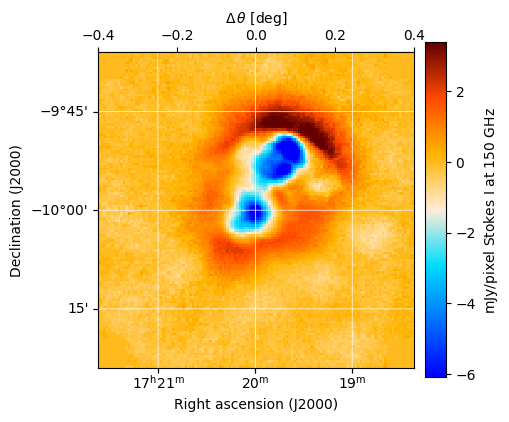

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.